In [35]:
import pandas as pd 
import numpy as np
wine = pd.read_csv("C:/Users/1234/Downloads/wine.csv")
wine.describe()
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [36]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 

In [37]:
wine.Type.unique()

array([1, 2, 3], dtype=int64)

###### Inference:  Original data set has three classes

In [38]:
# Considering only numerical data 
wine.data = wine.iloc[:,1:]
wine.data.head(4)


C:\Users\1234\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480


In [39]:
# Normalizing the numerical data 
wine_normal = scale(wine.data)

In [40]:
wine_normal

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [41]:
pca = PCA()
pca_values = pca.fit_transform(wine_normal)

In [42]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var


array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [43]:
pca.components_[0]

array([ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
        0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
        0.29671456,  0.37616741,  0.28675223])

In [44]:
# Cumulative variance 

var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1


array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

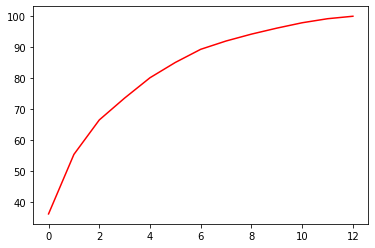

In [45]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")

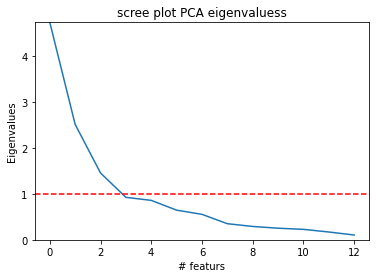

In [46]:
#scree plot
plt.ylim(0,max(pca.explained_variance_))
plt.plot(pca.explained_variance_);plt.xlabel("# featurs");plt.ylabel("Eigenvalues");plt.title("scree plot PCA eigenvaluess")
plt.axhline(y=1,color='r',linestyle='--')

###### Inference: We use a scree plot to select the principal components to keep. An ideal curve should be steep, 
###### then bends at an “elbow” this is  cutting-off point and after that flattens out. In above figure, just 
###### PC 1,2, and 3 are enough to describe the data.

In [47]:
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

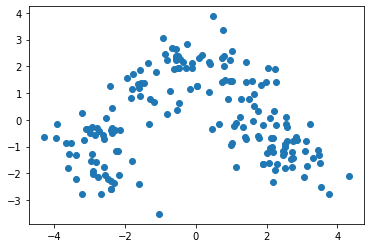

In [48]:
# plot between PCA1 and PCA2 
x = pca_values[:,0]
y = pca_values[:,1]
z=pca_values[:,2]
plt.scatter(x,y)

###### Inference: Above scatter plot show there is no correlation between PC1 and PC2.


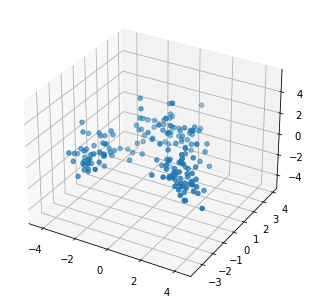

In [49]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x,y,z)
plt.show()

#### Hierarchy Clustering

In [50]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [51]:
df=pd.DataFrame(pca_values[:,0:3],columns=['pc1','pc2','pc3'])

In [52]:
df.head()

,pc1,pc2,pc3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688


array([[<AxesSubplot:title={'center':'pc1'}>,
        <AxesSubplot:title={'center':'pc2'}>],
       [<AxesSubplot:title={'center':'pc3'}>, <AxesSubplot:>]],
      dtype=object)

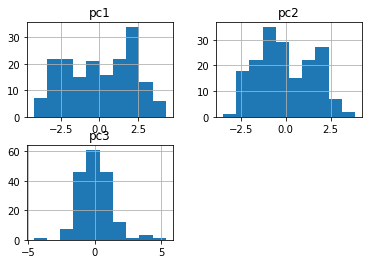

In [53]:
df.hist()

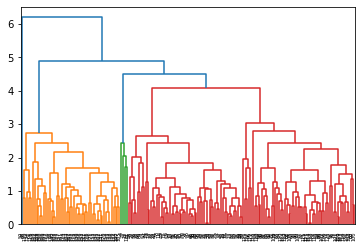

In [54]:
dendrogram=sch.dendrogram(sch.linkage(df,method='average'))

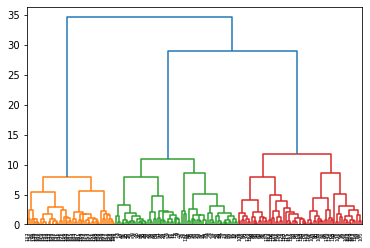

In [55]:
dendrogram=sch.dendrogram(sch.linkage(df,method='ward'))

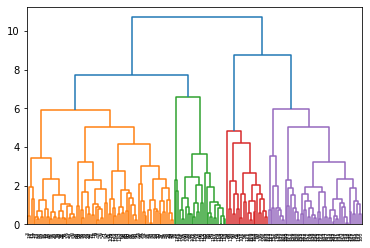

In [56]:
dendrogram=sch.dendrogram(sch.linkage(df,method='complete'))

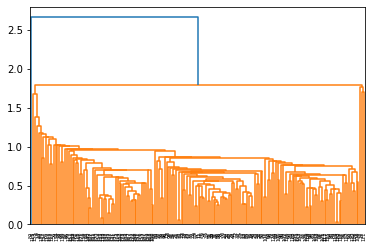

In [57]:
dendrogram=sch.dendrogram(sch.linkage(df,method='single'))

In [58]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [59]:
y_hc=hc.fit_predict(df)
CLusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [60]:
df1=df.copy()
df1['Cluster_id']=hc.labels_
df1

,pc1,pc2,pc3,Cluster_id
0,3.316751,-1.443463,-0.165739,2
1,2.209465,0.333393,-2.026457,2
2,2.516740,-1.031151,0.982819,2
3,3.757066,-2.756372,-0.176192,2
4,1.008908,-0.869831,2.026688,2
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1
174,-2.601956,-1.757229,0.207581,1
175,-2.677839,-2.760899,-0.940942,1
176,-2.387017,-2.297347,-0.550696,1


In [61]:
df1["Cluster_id"].unique()

array([2, 0, 1], dtype=int64)

#### K-means Clustering

In [62]:
from sklearn.cluster import KMeans

In [63]:
# first choose k (Elbow plot)
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
#wcss

Text(0.5, 1.0, 'Elbow plot')

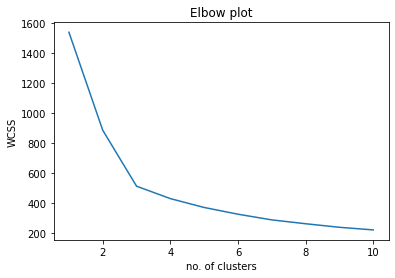

In [64]:
plt.plot(range(1,11),wcss);plt.xlabel("no. of clusters");plt.ylabel("WCSS");plt.title("Elbow plot")

##### Inference: 
##### To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point 
##### after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal 
##### number of clusters for the data is 3.

In [65]:
clust=KMeans(3,random_state=22)
clust.fit(df)

KMeans(n_clusters=3, random_state=22)

In [66]:
clust.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [67]:
df2=df.copy()
df2['kmean_clusters']=clust.labels_
df2.head()

,pc1,pc2,pc3,kmean_clusters
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1


In [70]:
df2.kmean_clusters.unique().

array([1, 0, 2])

In [74]:
comparison=pd.DataFrame({"Clustering methods":['Original data (No Method used)','Heirarchial Clustering','K-means Clustering'],
            "Clusters":[wine['Type'].unique(),df1.Cluster_id.unique(),df2.kmean_clusters.unique()],"No. of cluster":[3,3,3]})
comparison

,Clustering methods,Clusters,No. of cluster
0,Original data (No Method used),"[1, 2, 3]",3
1,Heirarchial Clustering,"[2, 0, 1]",3
2,K-means Clustering,"[1, 0, 2]",3


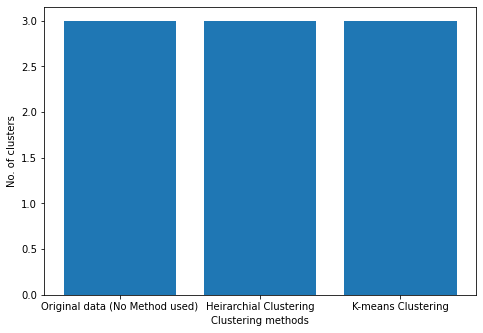

In [79]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(comparison.iloc[:,0],comparison.iloc[:,2])
plt.ylabel("No. of clusters")
plt.xlabel("Clustering methods")
plt.show()

#### Inference:
#### From the above diagram, There are same number of cluster for each clustering metods. 